In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as ProfileReport
import IPython.display as display
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

In [839]:
# load dataset
train_df=pd.read_csv('Train.csv')
test_df=pd.read_csv('test.csv')

In [840]:
# train dataset
pd.set_option('display.max_columns',82)
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [841]:
# test dataset
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [842]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [843]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [844]:
# check duplicate values in train data
train_df.duplicated().sum()

0

In [845]:
# check duplicate values in test data
test_df.duplicated().sum()

0

<AxesSubplot:>

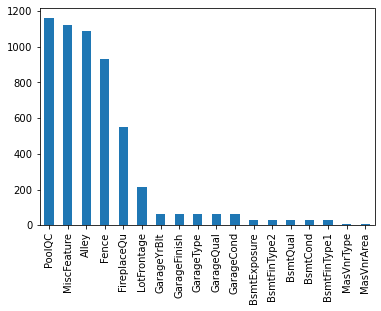

In [846]:
# null values in train data set
missing=train_df.isnull().sum().sort_values(ascending=False)
missing=missing[missing >0]
missing.plot(kind='bar')

In [847]:
# % of missing values in given train features
percentage=((train_df.isnull().sum()/train_df.isnull().count())*100).sort_values(ascending=False)
pd.DataFrame({'Missing Percentage':percentage,})

,Missing Percentage
PoolQC,99.400685
MiscFeature,96.232877
Alley,93.407534
Fence,79.708904
FireplaceQu,47.174658
...,...
ExterQual,0.000000
Exterior2nd,0.000000
Exterior1st,0.000000
RoofMatl,0.000000


<AxesSubplot:>

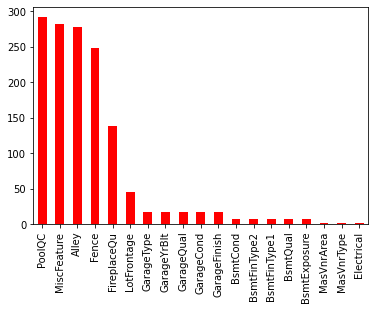

In [848]:
# null values in test data set
missing=test_df.isnull().sum().sort_values(ascending=False)
missing=missing[missing > 0]
missing.plot(kind='bar',color='r')

In [849]:
# % of missing values in given test features
percentage=(test_df.isnull().sum()/len(test_df)*100).sort_values(ascending=False)
pd.DataFrame({'Missing Percentage':percentage,})

,Missing Percentage
PoolQC,100.000000
MiscFeature,96.575342
Alley,95.205479
Fence,84.931507
FireplaceQu,47.602740
...,...
TotalBsmtSF,0.000000
Heating,0.000000
MSSubClass,0.000000
CentralAir,0.000000


<AxesSubplot:>

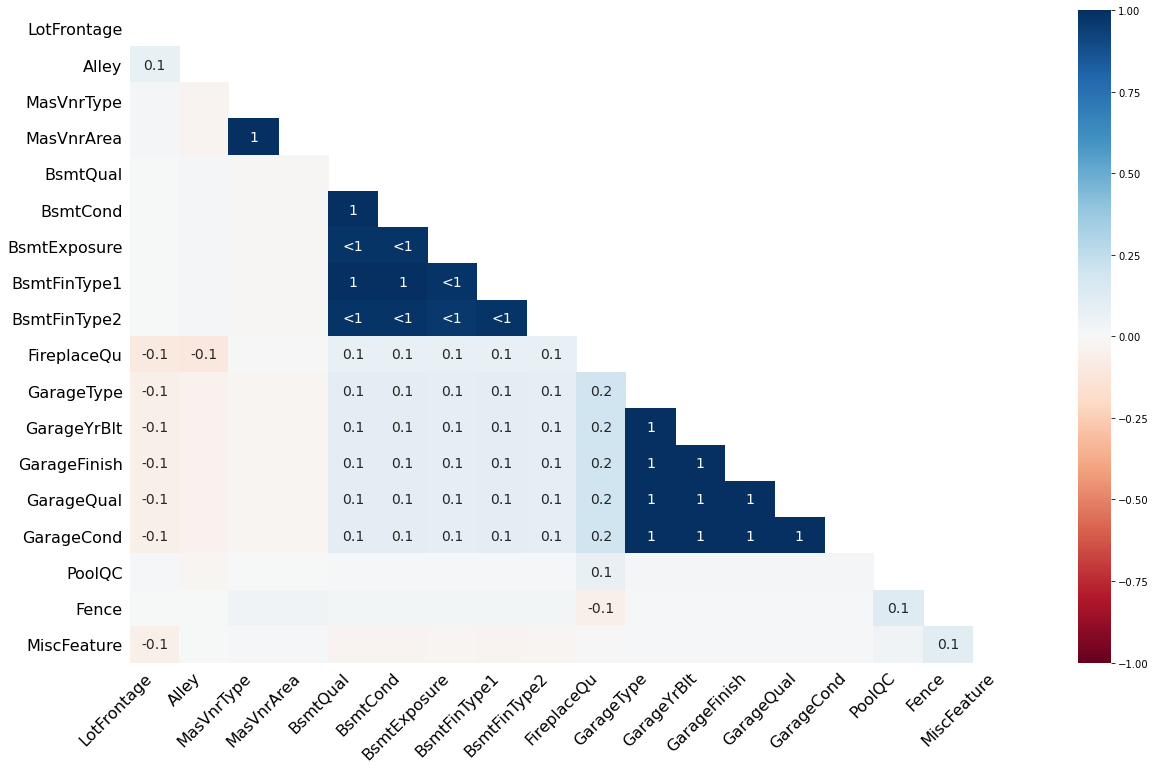

In [850]:
# correlation with missing values
msno.heatmap(train_df)

##### from the above analysis of drop columns which have more than 50% null values and even they don't have any positive correaltion with other features

In [851]:
# drop null values columns
train_df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1, inplace=True)
test_df.drop(['
              '],axis=1, inplace=True)

In [852]:
train_df.shape

(1168, 77)

In [853]:
test_df.shape

(292, 76)

In [854]:
# indentify numerical features of train dataset
numerical_features=[features for features in train_df.columns if train_df[features].dtypes != 'O']
len(numerical_features)

38

In [855]:
# indentify numerical features of test data
numerical_test=[features for features in test_df.columns if test_df[features].dtypes != 'O']
len(numerical_test)

37

In [856]:
# time features in train dataset
year_features=[features for features in numerical_features if 'Yr' in features or 'Year'in features or 'Mo' in features]
len(year_features)

5

In [857]:
# time features in test data
year_test=[features for features in numerical_test if 'Yr' in features or 'Year'in features or 'Mo' in features]
len(year_test)

5

In [858]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [859]:
# identify descreate features of numerical train data
descreate_features=[i for i in numerical_features if len(train_df[i].unique())<25 and i not in year_features+['Id']]
descreate_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [860]:
len(descreate_features)

16

In [861]:
# identify descreate features of numerical in test data
descreate_test=[i for i in numerical_test if len(test_df[i].unique())<20 and i not in year_test+['Id']]
len(descreate_test)

16

In [862]:
# identify countinus features of numeric columns train data
countinus_features=[i for i in numerical_features if i not in descreate_features+year_features+['Id']]
countinus_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [863]:
len(countinus_features)

16

In [864]:
# identify countinus features of numeric columns in test data
countinus_test=[i for i in numerical_test if i not in descreate_test+year_test+['Id']]
len(countinus_test)

15

In [865]:
# identify categorical features from dataset in train data
categorical_features=[i for i in train_df.columns if train_df[i].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [866]:
len(categorical_features)

39

In [867]:
# identify categorical features from dataset in test data
categorical_test=[i for i in test_df.columns if test_df[i].dtypes == 'O']
len(categorical_test)

39

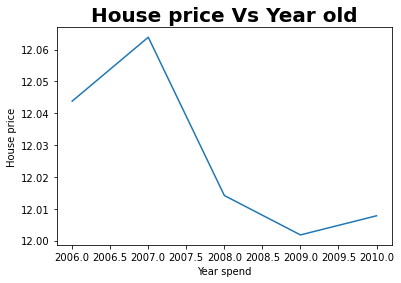

In [956]:
# checking price according to years old
train_df.groupby('YrSold')['SalePrice'].mean().plot()
plt.title('House price Vs Year old',fontsize=20,fontweight='bold')
plt.xlabel('Year spend',fontsize=10)
plt.ylabel('House price',fontsize=10)
plt.show()

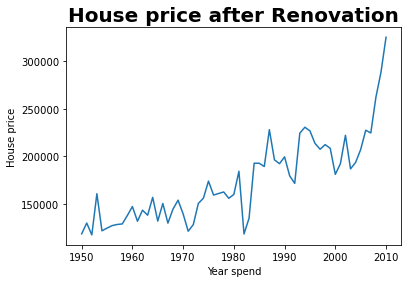

In [869]:
# checking price after Renovation done
train_df.groupby('YearRemodAdd')['SalePrice'].mean().plot()
plt.title('House price after Renovation',fontsize=20,fontweight='bold')
plt.xlabel('Year spend',fontsize=10)
plt.ylabel('House price',fontsize=10)
plt.show()

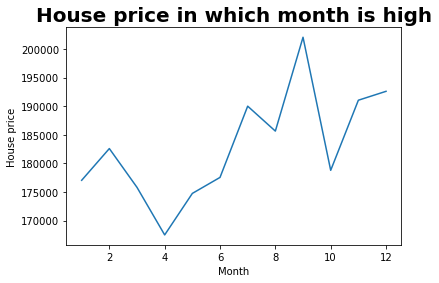

In [870]:
# checking price in which month is high
train_df.groupby('MoSold')['SalePrice'].mean().plot()
plt.title('House price in which month is high',fontsize=20,fontweight='bold')
plt.xlabel('Month',fontsize=10)
plt.ylabel('House price',fontsize=10)
plt.show()

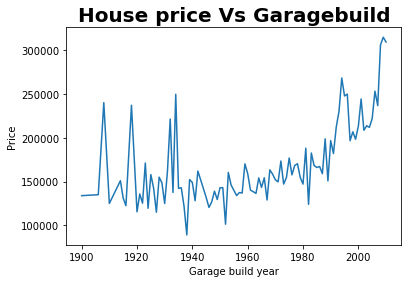

In [871]:
# checking price with garage build
train_df.groupby('GarageYrBlt')['SalePrice'].mean().plot()
plt.title('House price Vs Garagebuild',fontsize=20,fontweight='bold')
plt.ylabel('Price',fontsize=10)
plt.xlabel('Garage build year',fontsize=10)
plt.show()

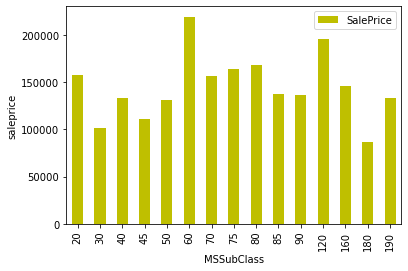

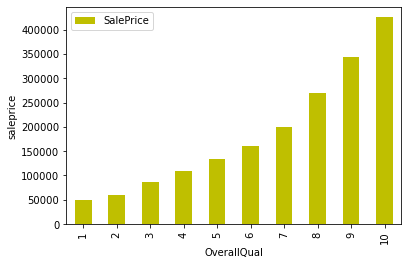

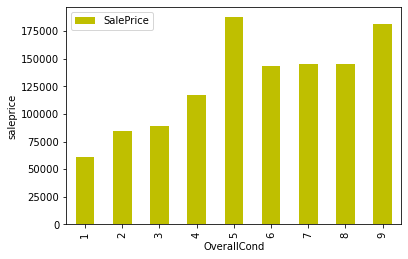

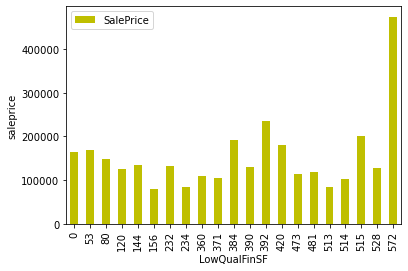

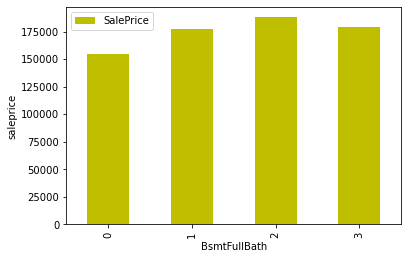

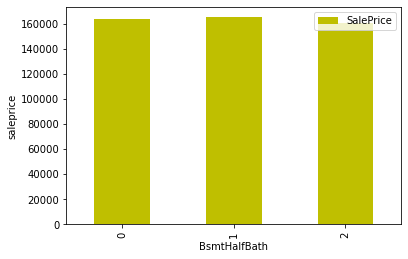

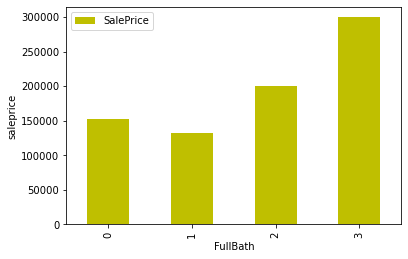

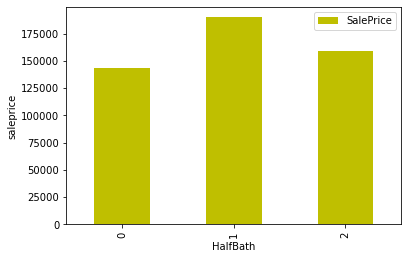

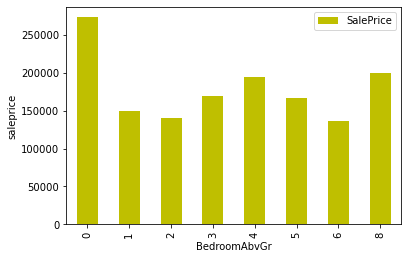

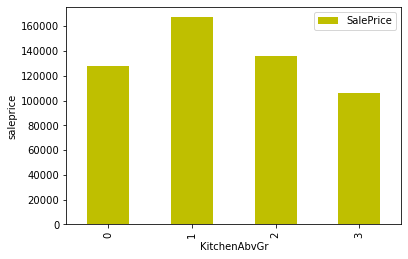

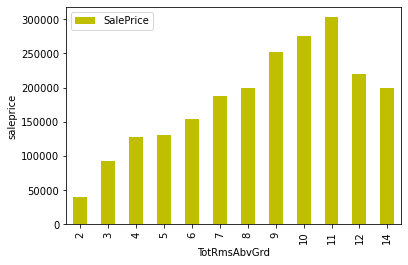

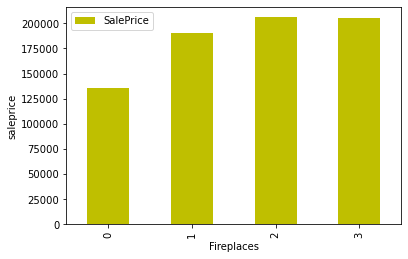

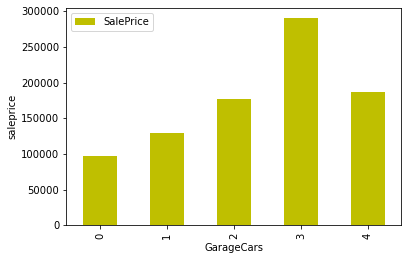

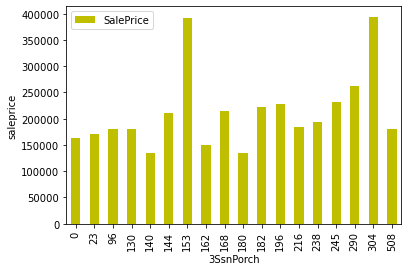

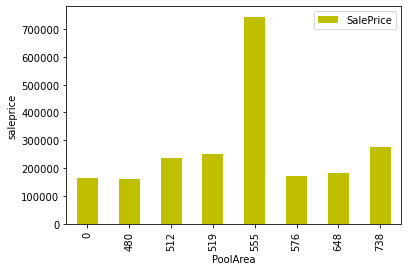

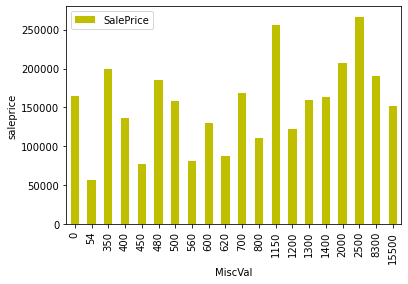

In [872]:
# Descreate features affecting the house price
for feature in descreate_features:
    train_df.groupby(feature)['SalePrice'].median().plot.bar(legend=feature,color='y')
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel('saleprice')
    plt.show()

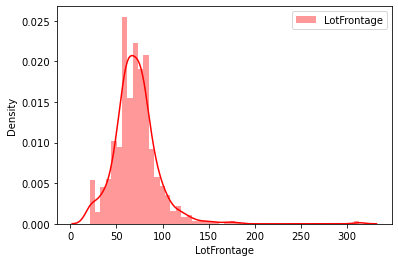

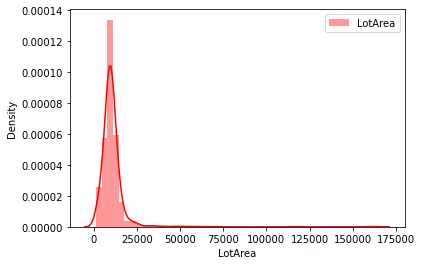

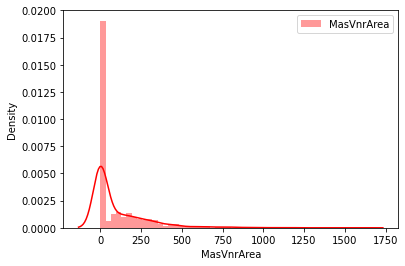

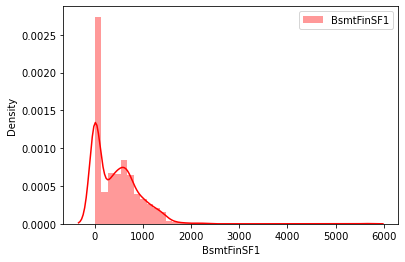

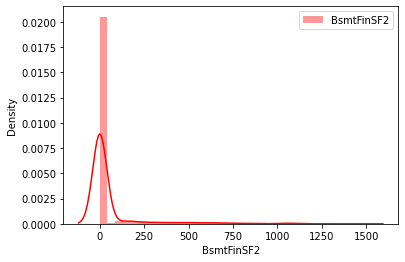

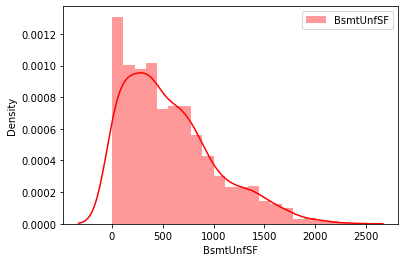

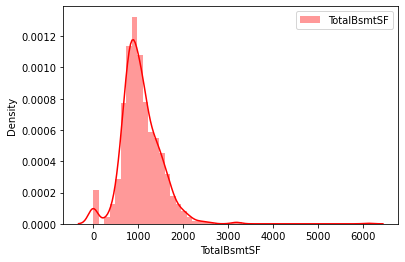

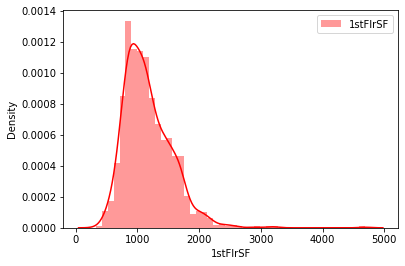

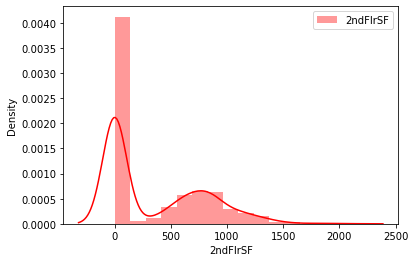

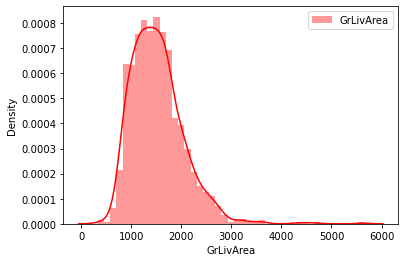

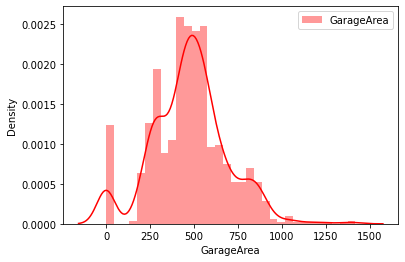

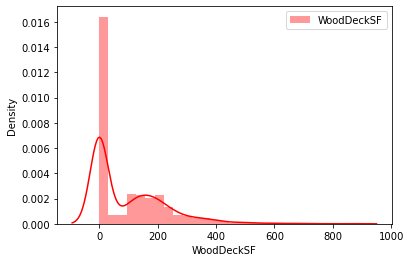

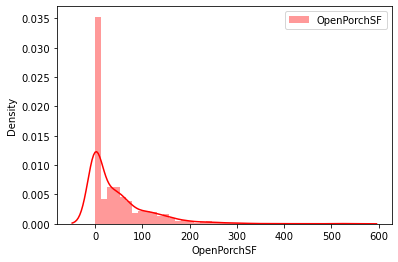

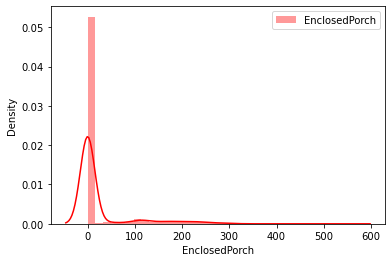

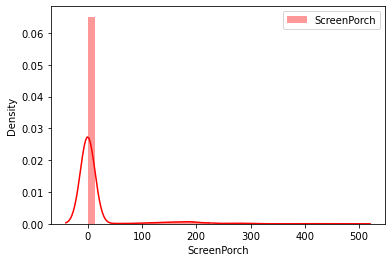

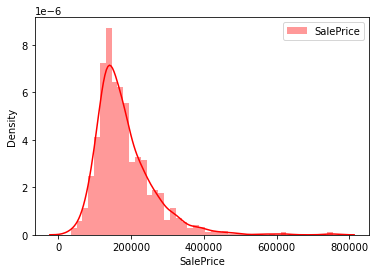

In [873]:
# Distribution plot 
for i in countinus_features:
    plt.plot()
    sns.distplot(train_df[i],color='r',label=i)
    plt.legend()
    plt.show()

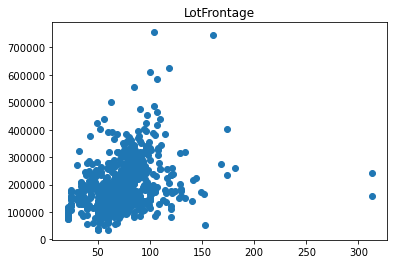

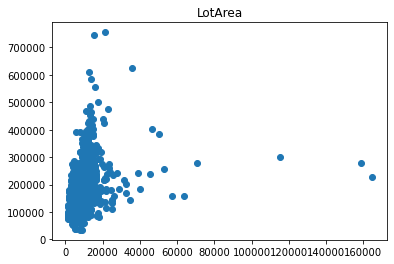

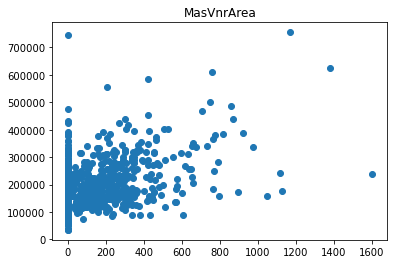

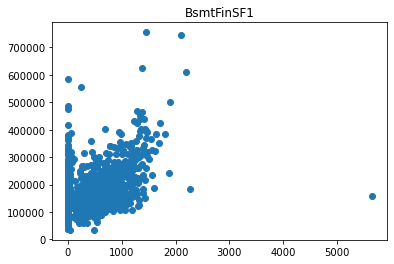

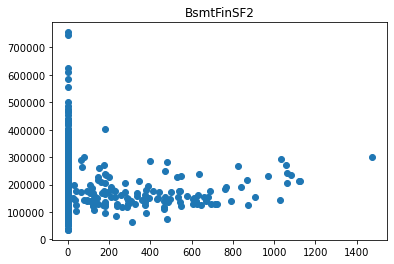

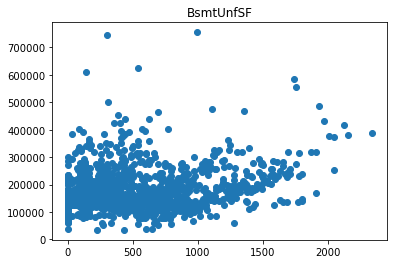

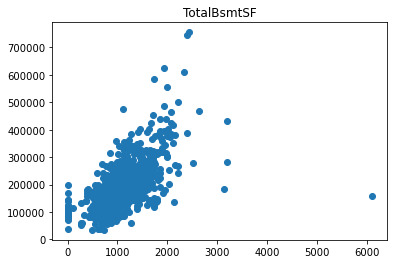

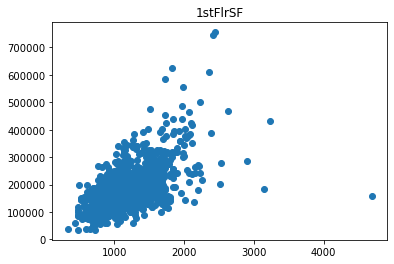

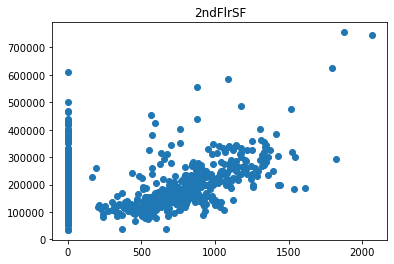

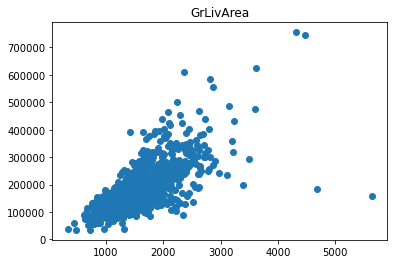

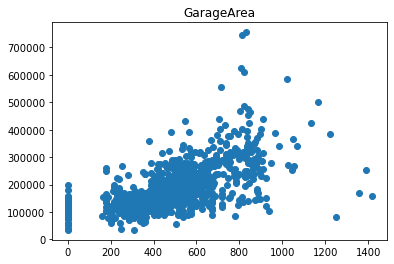

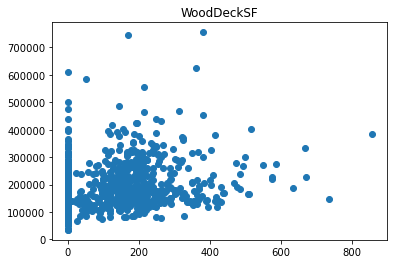

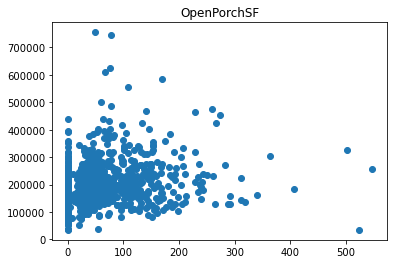

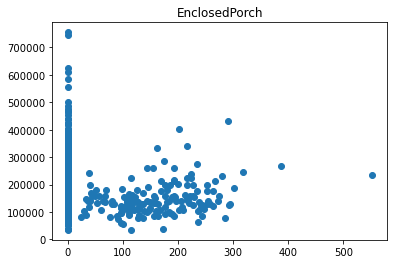

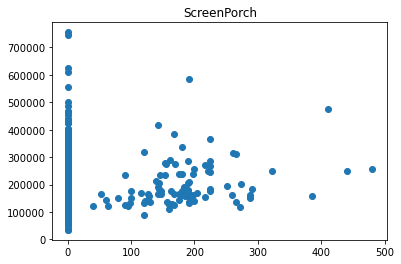

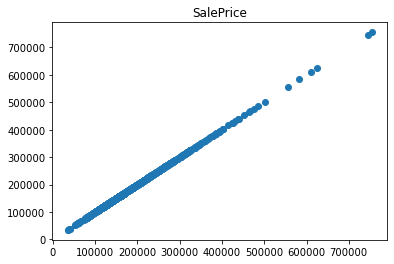

In [874]:
# scatter plot with refrance to target column
for feature in countinus_features:
    plt.figure()
    plt.scatter(train_df[feature],train_df['SalePrice'])
    plt.title(feature)

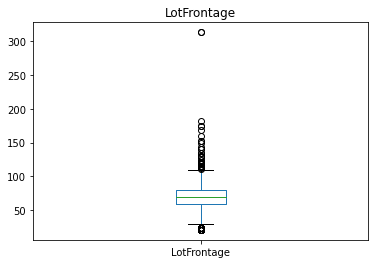

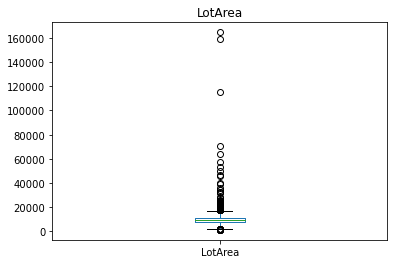

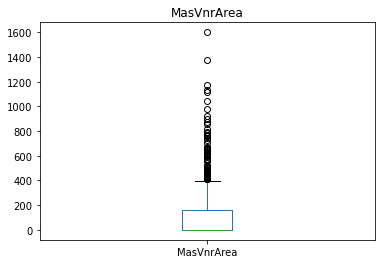

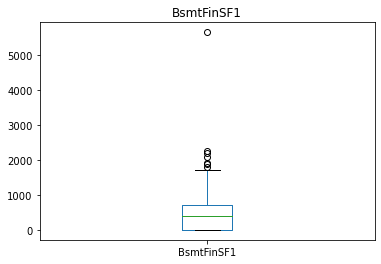

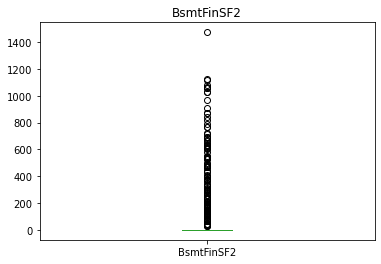

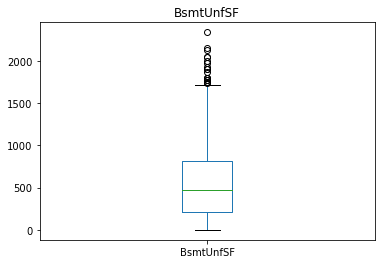

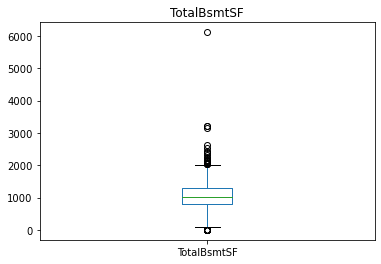

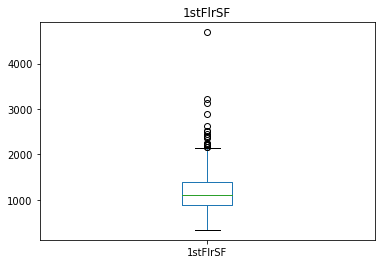

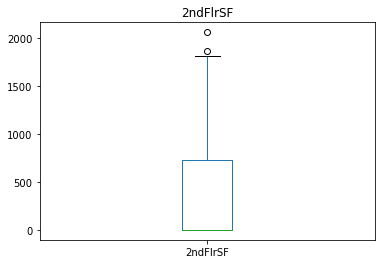

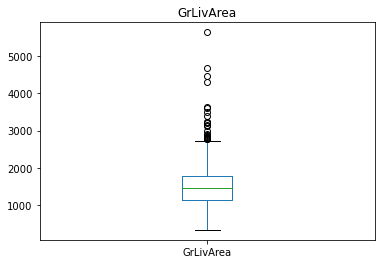

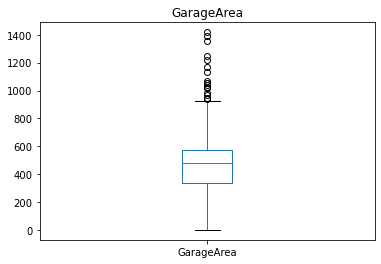

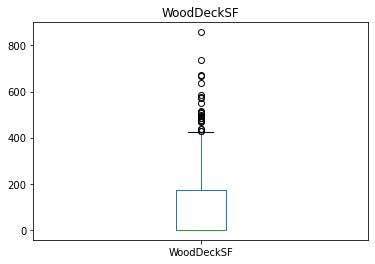

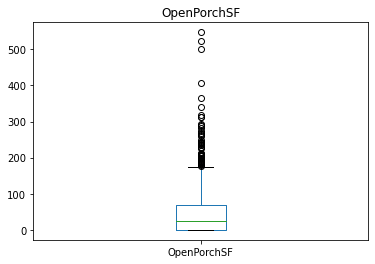

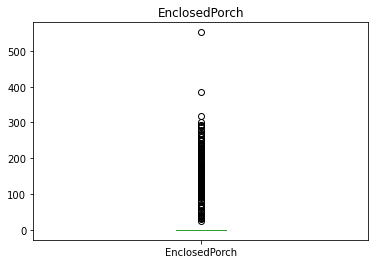

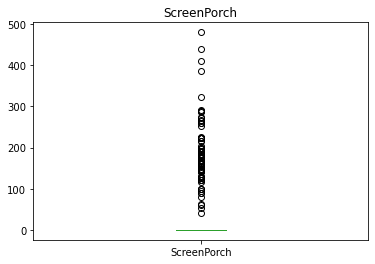

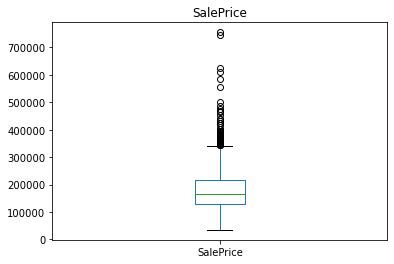

In [875]:
# outliers visual
for feature in countinus_features:
    train_df[feature].plot.box()
    plt.title(feature)
    plt.show()

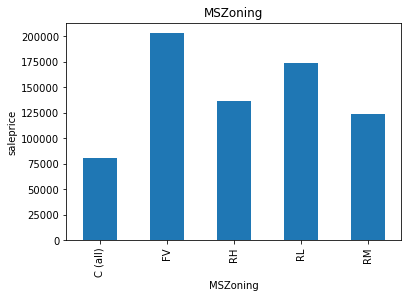

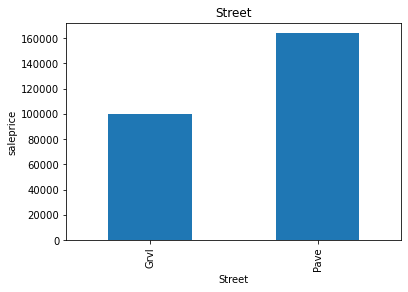

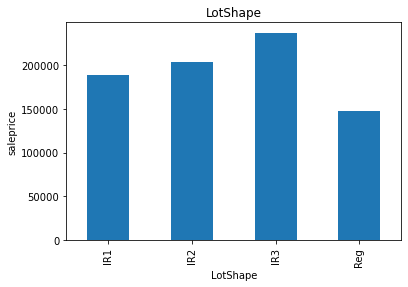

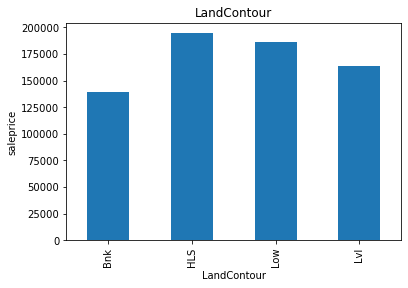

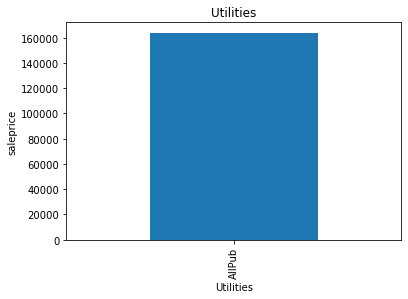

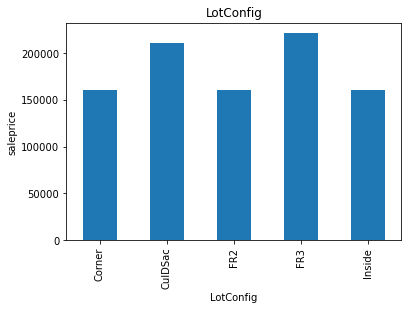

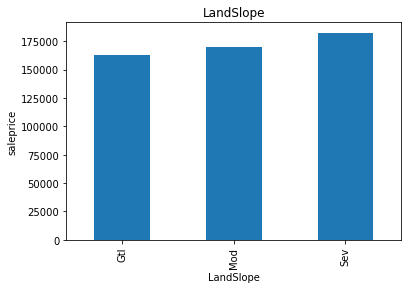

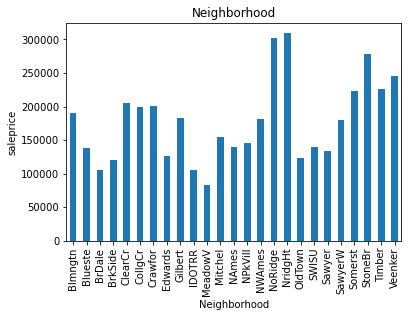

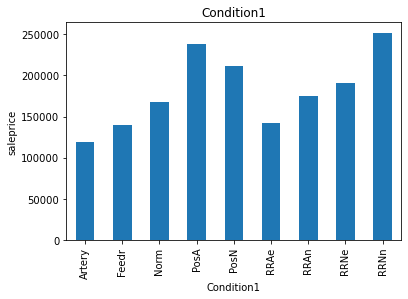

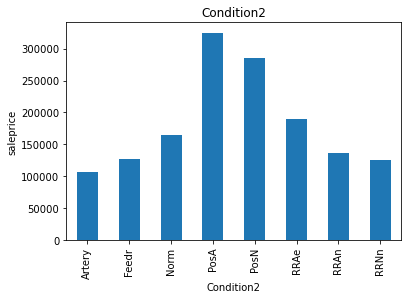

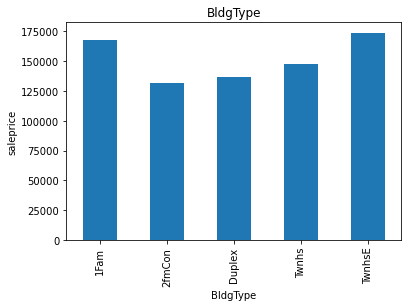

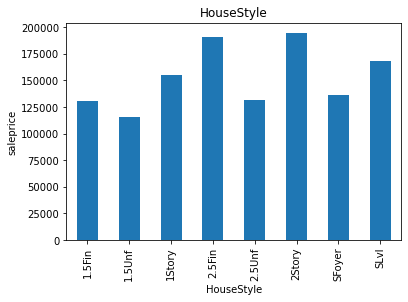

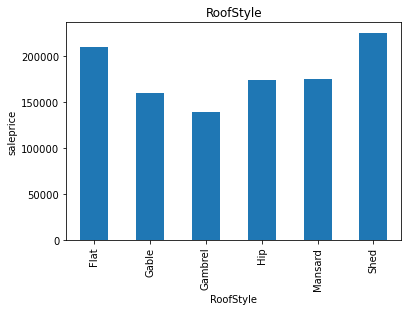

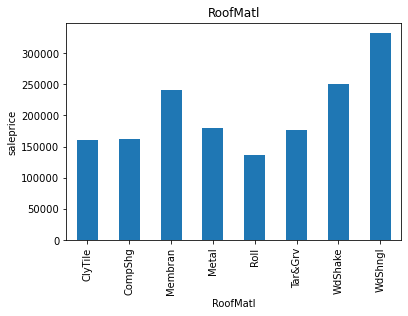

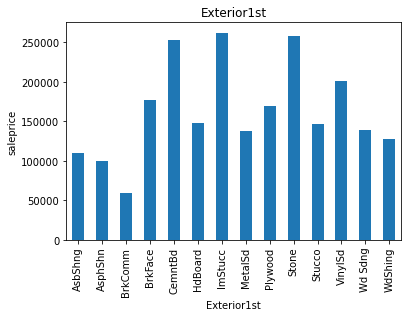

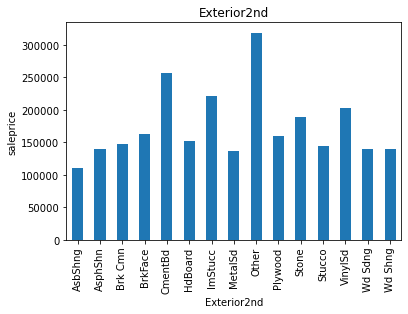

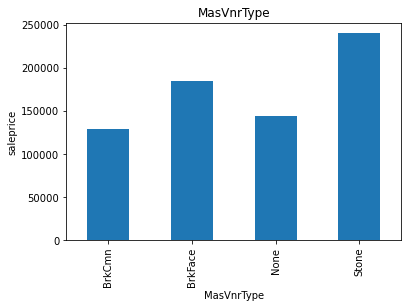

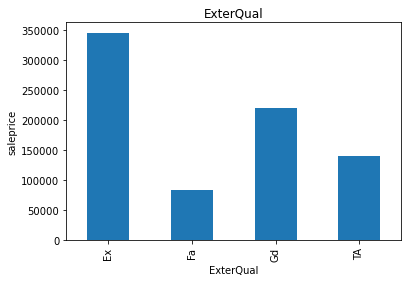

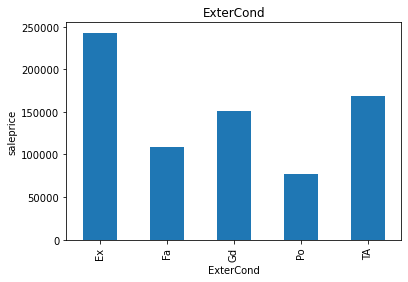

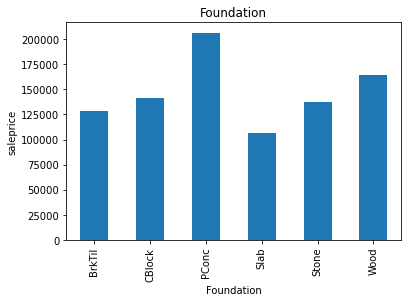

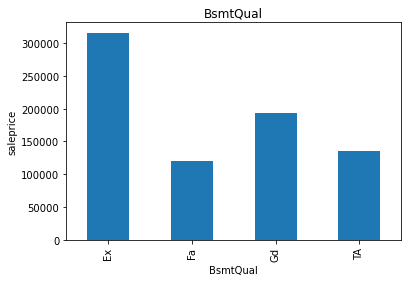

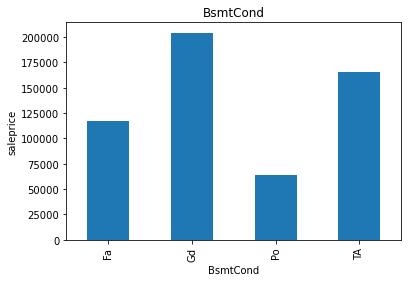

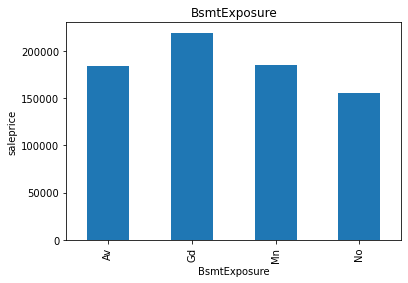

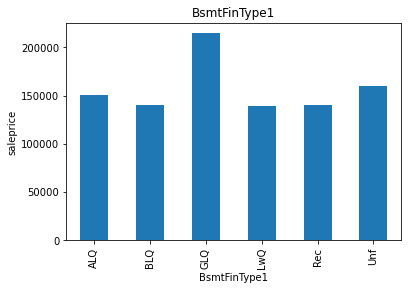

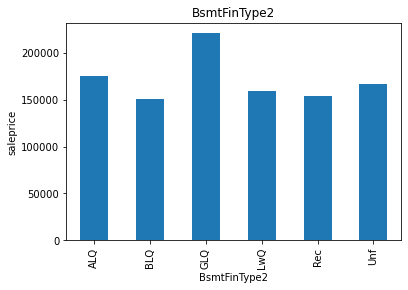

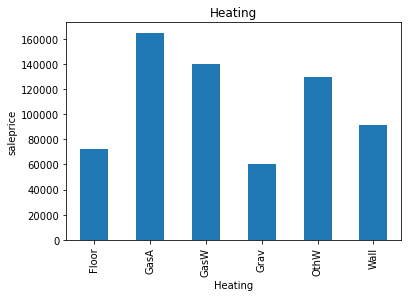

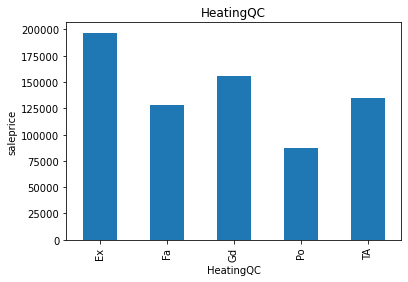

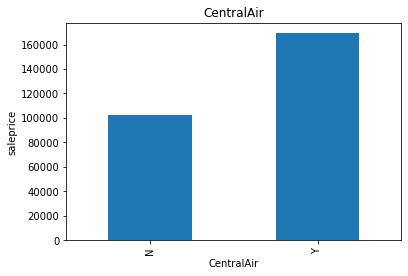

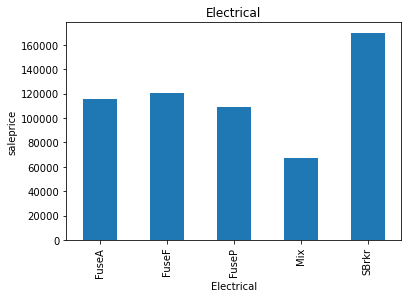

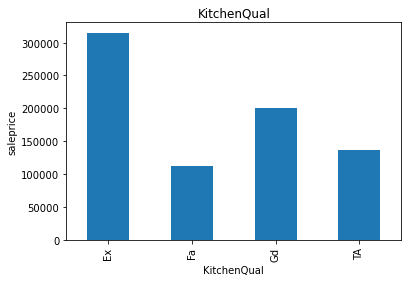

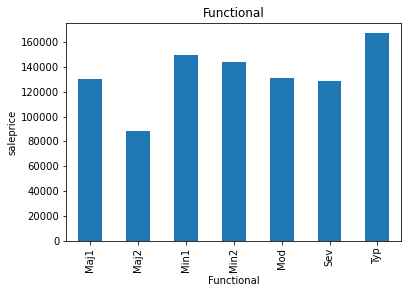

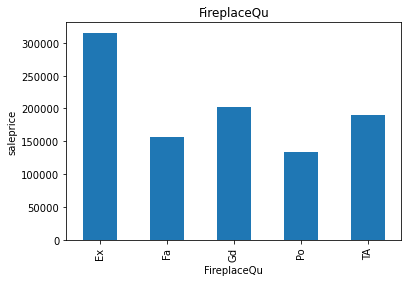

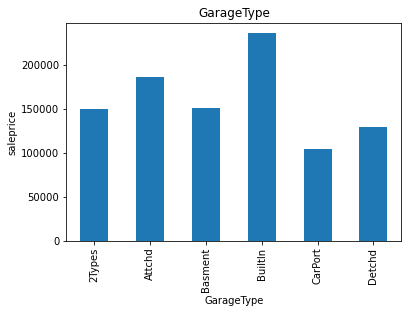

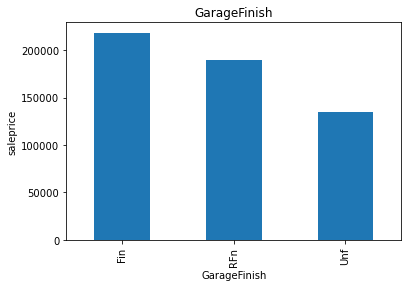

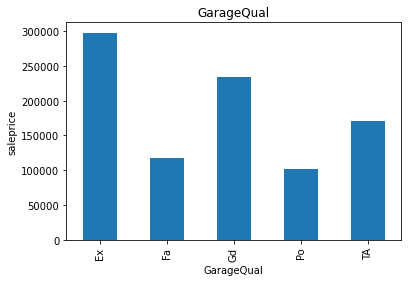

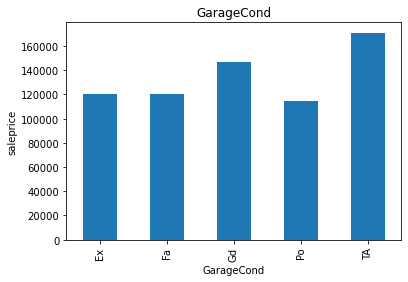

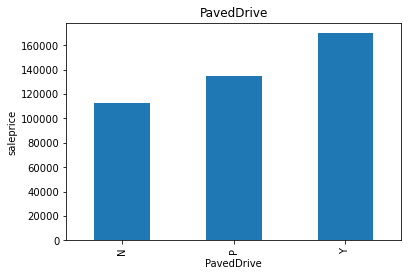

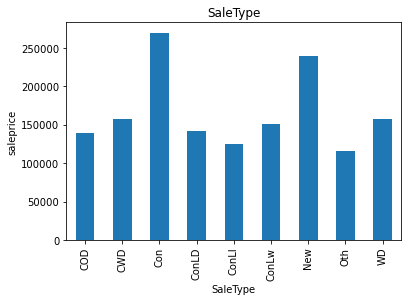

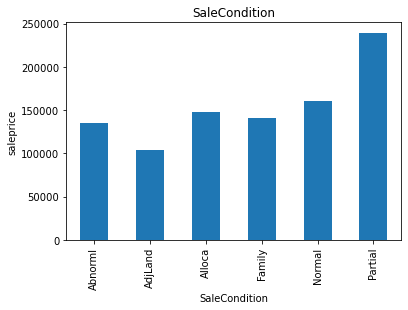

In [876]:
# categorical features affect house price
for feature in categorical_features:
    train_df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('saleprice')
    plt.show()

In [877]:
# null values in categories columns
for i in categorical_features:
    print(i,":",train_df[i].isnull().sum())

MSZoning : 0
Street : 0
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 7
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 30
BsmtCond : 30
BsmtExposure : 31
BsmtFinType1 : 30
BsmtFinType2 : 31
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 0
KitchenQual : 0
Functional : 0
FireplaceQu : 551
GarageType : 64
GarageFinish : 64
GarageQual : 64
GarageCond : 64
PavedDrive : 0
SaleType : 0
SaleCondition : 0


In [878]:
for i in categorical_test:
    print(i,":",test_df[i].isnull().sum())

MSZoning : 0
Street : 0
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 1
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 7
BsmtCond : 7
BsmtExposure : 7
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
KitchenQual : 0
Functional : 0
FireplaceQu : 139
GarageType : 17
GarageFinish : 17
GarageQual : 17
GarageCond : 17
PavedDrive : 0
SaleType : 0
SaleCondition : 0


In [879]:
# null values in countinus columns
for i in countinus_features:
    print(i,":",train_df[i].isnull().sum())

LotFrontage : 214
LotArea : 0
MasVnrArea : 7
BsmtFinSF1 : 0
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
1stFlrSF : 0
2ndFlrSF : 0
GrLivArea : 0
GarageArea : 0
WoodDeckSF : 0
OpenPorchSF : 0
EnclosedPorch : 0
ScreenPorch : 0
SalePrice : 0


In [880]:
for i in countinus_test:
    print(i,":",test_df[i].isnull().sum())

LotFrontage : 45
LotArea : 0
MasVnrArea : 1
BsmtFinSF1 : 0
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
1stFlrSF : 0
2ndFlrSF : 0
GrLivArea : 0
GarageArea : 0
WoodDeckSF : 0
OpenPorchSF : 0
EnclosedPorch : 0
ScreenPorch : 0


In [881]:
# filling null values of numerical train dataset
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
train_df[numerical_features]=imp.fit_transform(train_df[numerical_features])

In [882]:
# filling null values of numerical test dataset
test_df[numerical_test]=imp.fit_transform(test_df[numerical_test])

In [883]:
# filling null values of categorical train dataset
for i in categorical_features:
    train_df[i]=train_df[i].fillna(train_df[i].mode().iloc[0])

In [884]:
# filling null values of categorical test dataset
for i in categorical_test:
    test_df[i]=test_df[i].fillna(test_df[i].mode().iloc[0])

In [885]:
# Statistical description
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.807363,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.292808,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.440317,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.202053,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [886]:
# Co-relation with target column
train_df.corr()['SalePrice']

Id              -0.023897
MSSubClass      -0.060775
LotFrontage      0.323851
LotArea          0.249499
OverallQual      0.789185
OverallCond     -0.065642
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
BsmtFinSF1       0.362874
BsmtFinSF2      -0.010151
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
1stFlrSF         0.587642
2ndFlrSF         0.330386
LowQualFinSF    -0.032381
GrLivArea        0.707300
BsmtFullBath     0.212924
BsmtHalfBath    -0.011109
FullBath         0.554988
HalfBath         0.295592
BedroomAbvGr     0.158281
KitchenAbvGr    -0.132108
TotRmsAbvGrd     0.528363
Fireplaces       0.459611
GarageYrBlt      0.453840
GarageCars       0.628329
GarageArea       0.619000
WoodDeckSF       0.315444
OpenPorchSF      0.339500
EnclosedPorch   -0.115004
3SsnPorch        0.060119
ScreenPorch      0.100284
PoolArea         0.103280
MiscVal         -0.013071
MoSold           0.072764
YrSold          -0.045508
SalePrice        1.000000
Name: SalePr

In [887]:
# Encoding the categorical features of train dataset
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler
lb=OrdinalEncoder()
train_df[categorical_features]=lb.fit_transform(train_df[categorical_features])

In [888]:
# Encoding the categorical features of test dataset
test_df[categorical_test]=lb.fit_transform(test_df[categorical_test])

<AxesSubplot:>

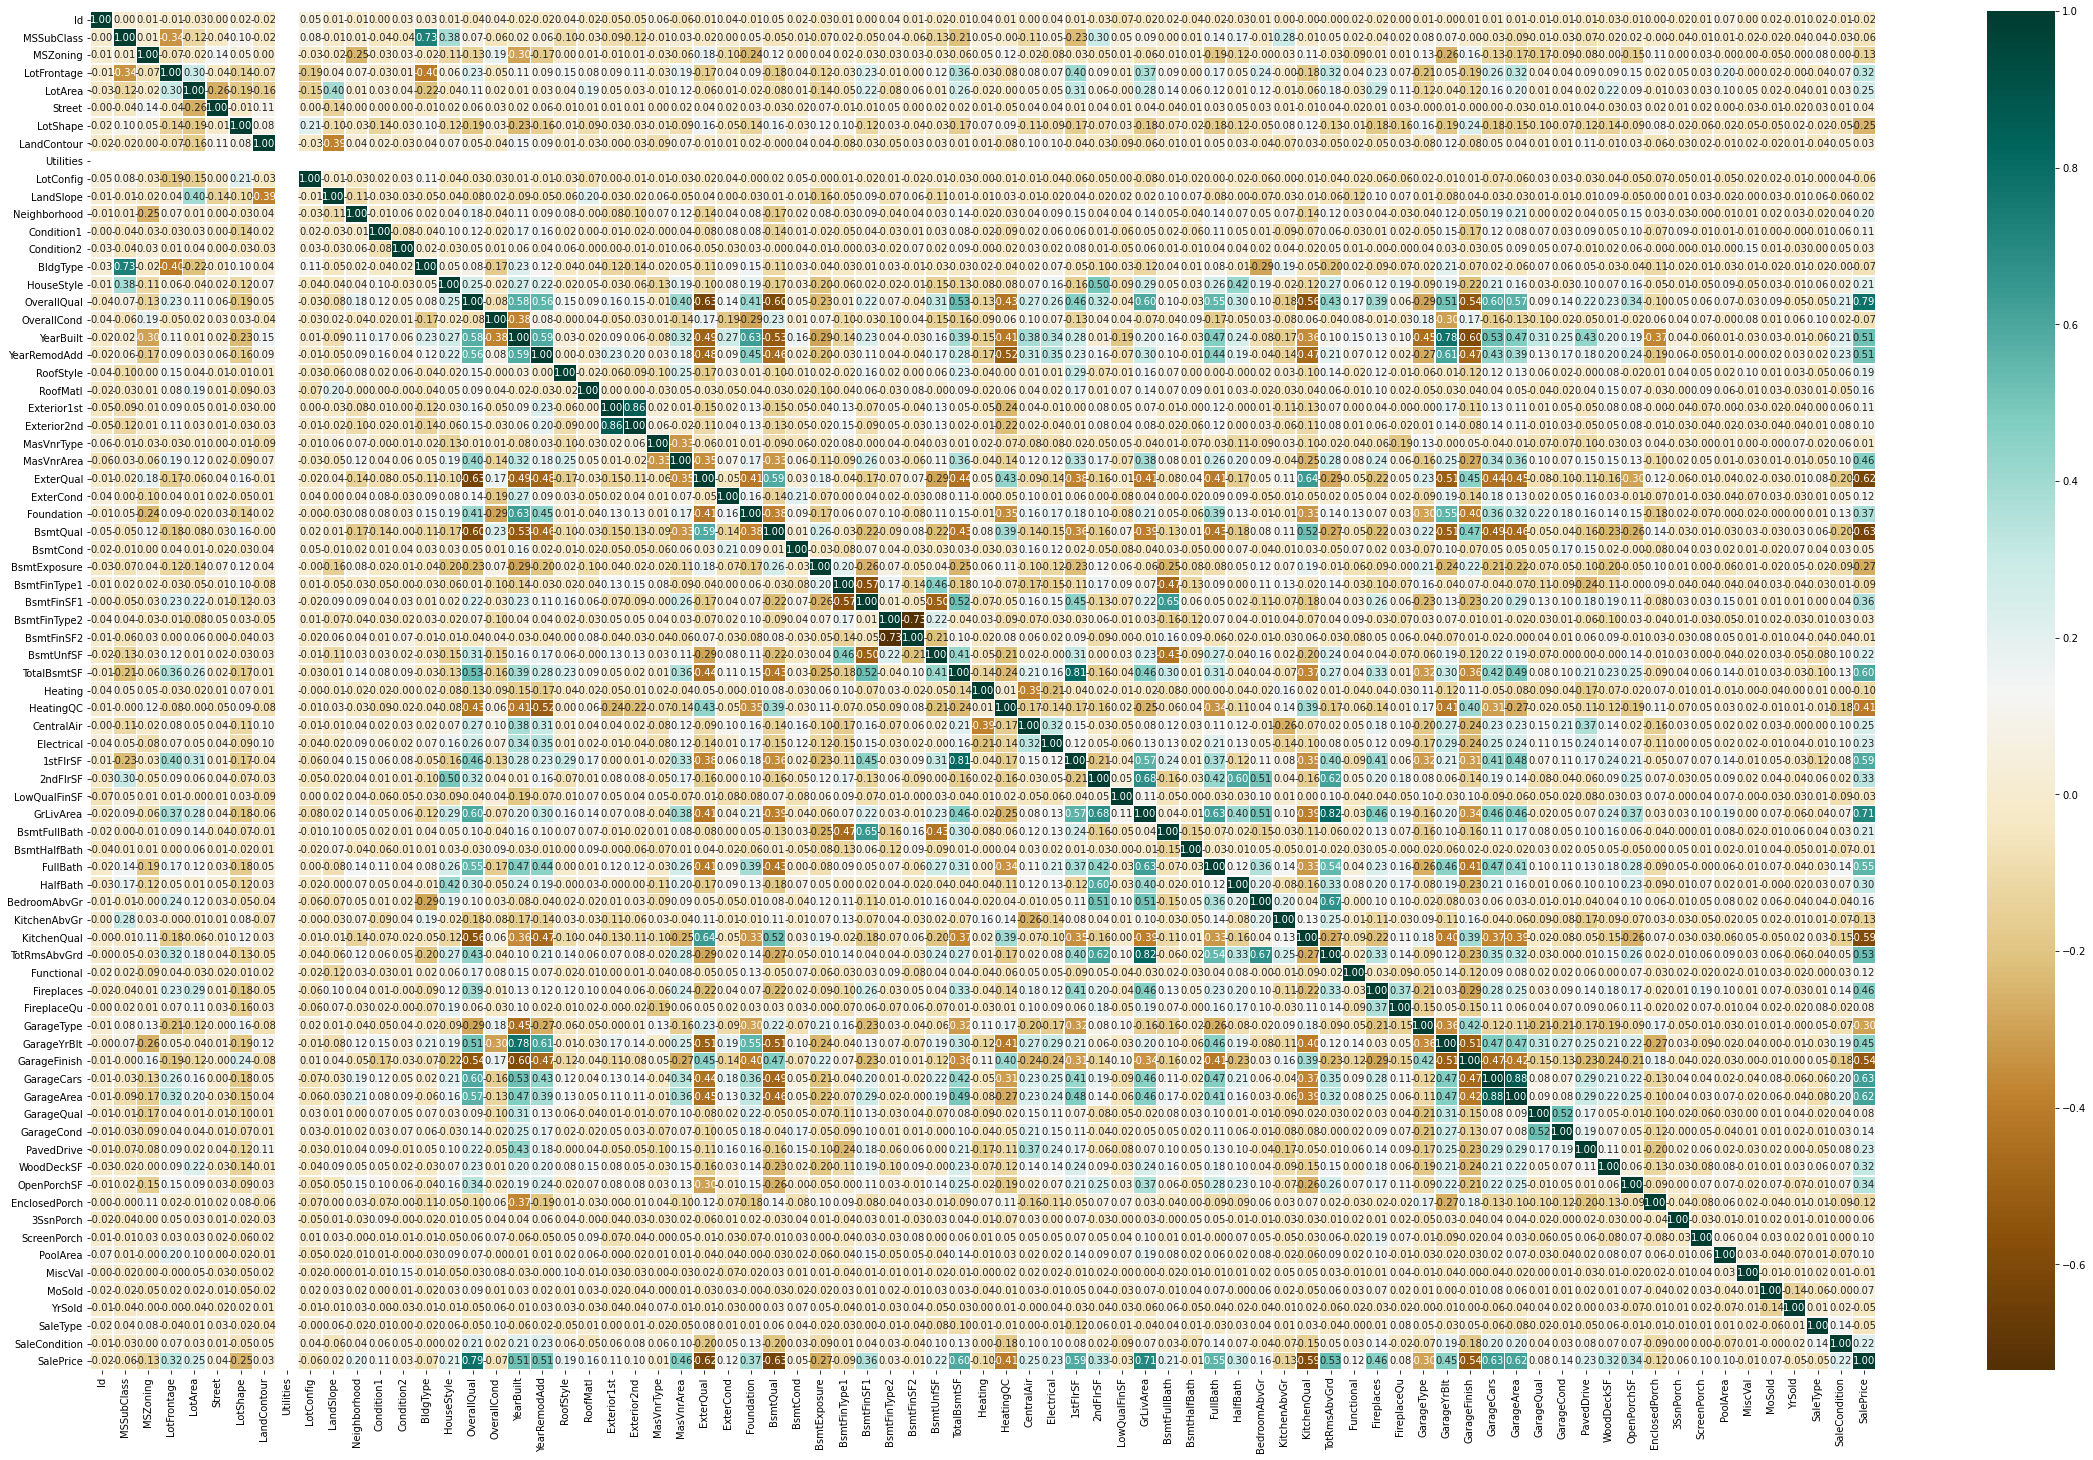

In [889]:
plt.figure(figsize=(40,25))
sns.heatmap(train_df.corr(),annot=True,cmap='BrBG',linewidth=0.5,fmt='1.2f')

In [890]:
# Check skewness of countinus columns
train_df[countinus_features].skew()

LotFrontage       2.733440
LotArea          10.659285
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
ScreenPorch       4.105741
SalePrice         1.953878
dtype: float64

In [891]:
test_df[countinus_test].skew()

LotFrontage       0.499491
LotArea          12.781805
MasVnrArea        1.978463
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
GrLivArea         1.010586
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
ScreenPorch       4.182351
dtype: float64

In [892]:
# Remove skewness from train dataset
for i in countinus_features:
    train_df[i]=np.log1p(train_df[i])

In [896]:
# Remove skewness from test dataset
for i in countinus_test:
    test_df[i]=np.log1p(test_df[i])

In [893]:
train_df[countinus_features].skew()

LotFrontage     -0.793980
LotArea         -0.169107
MasVnrArea       0.518966
BsmtFinSF1      -0.606859
BsmtFinSF2       2.502785
BsmtUnfSF       -2.129882
TotalBsmtSF     -5.146574
1stFlrSF         0.105795
2ndFlrSF         0.289335
GrLivArea        0.001448
GarageArea      -3.508379
WoodDeckSF       0.131075
OpenPorchSF     -0.004279
EnclosedPorch    2.079610
ScreenPorch      3.104665
SalePrice        0.073610
dtype: float64

In [897]:
test_df[countinus_test].skew()

LotFrontage     -1.011981
LotArea          0.065507
MasVnrArea       0.404284
BsmtFinSF1      -0.706179
BsmtFinSF2       2.605972
BsmtUnfSF       -2.676602
TotalBsmtSF     -5.435628
1stFlrSF         0.010574
2ndFlrSF         0.288581
GrLivArea        0.003550
GarageArea      -3.514317
WoodDeckSF       0.213635
OpenPorchSF     -0.193253
EnclosedPorch    2.218000
ScreenPorch      3.351284
dtype: float64

In [446]:
# timeoral feature like date ,time ,years
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train_df[feature]=train_df['YrSold']-train_df[feature]
    

In [898]:
for i in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    test_df[i]=test_df['YrSold']-test_df[i]

In [899]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337.0,20.0,2.0,1.688989,3.226494,1.0,0.0,1.0,0.0,0.0,0.0,21.0,2.0,0.0,0.0,2.0,9.0,5.0,2.0,1.0,3.0,0.0,9.0,11.0,3.0,1.923962,2.0,3.0,2.0,0.0,2.0,1.0,2.0,2.465494,5.0,0.0,2.278639,2.597733,0.0,0.0,1.0,3.0,2.597733,0.000000,0.0,2.597733,1.0,0.0,2.0,0.0,3.0,1.0,2.0,8.0,5.0,1.0,2.0,1.0,2.0,0.0,3.0,2.279970,4.0,4.0,2.0,1.890885,1.549354,0.000000,0.0,0.0,0.0,0.0,7.0,2007.0,5.0,2.0
1,1018.0,120.0,2.0,1.613574,2.943463,1.0,0.0,3.0,0.0,1.0,0.0,21.0,2.0,0.0,4.0,2.0,8.0,5.0,25.0,25.0,1.0,0.0,5.0,5.0,2.0,0.000000,2.0,3.0,1.0,2.0,2.0,0.0,2.0,2.408618,5.0,0.0,1.900275,2.458331,0.0,2.0,1.0,3.0,2.491495,0.000000,0.0,2.491495,1.0,0.0,1.0,0.0,1.0,1.0,2.0,4.0,5.0,1.0,0.0,1.0,25.0,1.0,2.0,2.226463,4.0,4.0,2.0,1.605241,0.000000,0.000000,0.0,0.0,0.0,0.0,8.0,2009.0,0.0,0.0
2,929.0,20.0,2.0,1.613574,3.169299,1.0,3.0,3.0,0.0,4.0,0.0,4.0,2.0,0.0,0.0,2.0,8.0,5.0,8.0,8.0,3.0,0.0,9.0,11.0,2.0,0.000000,2.0,3.0,2.0,2.0,2.0,0.0,5.0,0.000000,5.0,0.0,2.569370,2.569370,0.0,0.0,1.0,3.0,2.575456,0.000000,0.0,2.575456,0.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,5.0,1.0,4.0,1.0,8.0,1.0,2.0,2.202958,4.0,4.0,2.0,1.926795,1.844522,0.000000,0.0,0.0,0.0,0.0,6.0,2009.0,5.0,2.0
3,1148.0,70.0,2.0,1.651954,3.173639,1.0,3.0,0.0,0.0,4.0,0.0,5.0,2.0,0.0,0.0,5.0,7.0,7.0,68.0,59.0,1.0,0.0,6.0,7.0,2.0,0.000000,3.0,3.0,1.0,3.0,2.0,3.0,4.0,2.015297,5.0,0.0,2.144994,2.292123,0.0,0.0,1.0,3.0,2.352297,2.292123,0.0,2.534306,0.0,0.0,1.0,1.0,3.0,1.0,1.0,7.0,5.0,1.0,2.0,1.0,68.0,2.0,1.0,1.968823,4.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.0,2009.0,5.0,2.0
4,1227.0,60.0,2.0,1.688989,3.236315,1.0,0.0,3.0,0.0,1.0,0.0,20.0,1.0,0.0,0.0,5.0,6.0,5.0,1.0,1.0,1.0,0.0,9.0,11.0,3.0,1.648339,2.0,3.0,2.0,2.0,2.0,2.0,5.0,0.000000,5.0,0.0,2.363999,2.363999,0.0,0.0,1.0,3.0,2.363999,2.409496,0.0,2.599493,0.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,5.0,1.0,2.0,3.0,1.0,0.0,3.0,2.276408,4.0,4.0,2.0,1.730166,1.286679,0.000000,0.0,0.0,0.0,0.0,1.0,2008.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83.0,20.0,2.0,1.662535,3.121981,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,0.0,0.0,2.0,8.0,5.0,1.0,1.0,1.0,0.0,9.0,11.0,3.0,2.170645,3.0,3.0,2.0,2.0,2.0,3.0,2.0,1.436877,5.0,0.0,2.527563,2.534110,0.0,0.0,1.0,3.0,2.534110,0.000000,0.0,2.534110,0.0,0.0,2.0,0.0,3.0,1.0,2.0,6.0,5.0,1.0,2.0,1.0,1.0,1.0,3.0,2.314296,4.0,4.0,2.0,1.831218,1.727410,0.000000,0.0,0.0,0.0,0.0,10.0,2008.0,5.0,2.0
288,1048.0,20.0,2.0,1.578670,3.090492,1.0,1.0,3.0,0.0,4.0,0.0,4.0,2.0,0.0,0.0,2.0,5.0,5.0,14.0,13.0,1.0,0.0,9.0,11.0,2.0,0.000000,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.284365,5.0,0.0,2.044326,2.394850,0.0,0.0,1.0,3.0,2.394850,0.000000,0.0,2.394850,0.0,1.0,1.0,0.0,3.0,1.0,3.0,5.0,5.0,0.0,2.0,5.0,12.0,2.0,2.0,2.278194,4.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,2008.0,5.0,2.0
289,17.0,20.0,2.0,1.613574,3.152781,1.0,0.0,3.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,2.0,6.0,7.0,40.0,40.0,1.0,0.0,10.0,12.0,1.0,1.894048,3.0,3.0,1.0,3.0,2.0,3.0,0.0,2.233230,5.0,0.0,2.142929,2.399105,0.0,0.0,1.0,3.0,2.

In [613]:
# Spliting dataset
x=train_df.drop(['SalePrice'],axis=1)
y=train_df['SalePrice']

In [614]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,127.0,120.0,3.0,4.262680,8.502891,1.0,0.0,3.0,0.0,4.0,0.0,13.0,2.0,2.0,4.0,2.0,6.0,5.0,31.0,31.0,1.0,1.0,8.0,9.0,2.0,0.000000,3.0,4.0,1.0,2.0,3.0,3.0,0.0,4.795791,5.0,0.000000,6.865891,6.983790,1.0,4.0,1.0,4.0,6.865891,0.000000,0.0,6.865891,0.0,0.0,2.0,0.0,2.0,1.0,3.0,5.0,6.0,1.0,4.0,1.0,30.0,1.0,2.0,6.089045,4.0,4.0,2.0,0.000000,5.327876,0.000000,0.0,0.0000,0.0,0.0,2.0,2007.0,8.0,4.0
1,889.0,20.0,3.0,4.564348,9.671934,1.0,0.0,3.0,0.0,4.0,1.0,12.0,2.0,2.0,0.0,2.0,8.0,6.0,37.0,37.0,0.0,5.0,12.0,13.0,2.0,0.000000,2.0,2.0,2.0,3.0,1.0,1.0,0.0,5.863631,4.0,6.714171,6.950815,7.704361,1.0,0.0,1.0,4.0,7.704361,0.000000,0.0,7.704361,1.0,0.0,2.0,0.0,4.0,1.0,2.0,8.0,6.0,1.0,4.0,1.0,37.0,2.0,2.0,6.432940,4.0,4.0,2.0,4.406719,5.337538,0.000000,0.0,5.4161,0.0,0.0,10.0,2007.0,8.0,4.0
2,793.0,60.0,3.0,4.532599,9.202409,1.0,0.0,3.0,0.0,1.0,0.0,15.0,2.0,2.0,0.0,5.0,7.0,5.0,11.0,10.0,1.0,1.0,7.0,7.0,2.0,0.000000,2.0,4.0,2.0,2.0,3.0,0.0,2.0,6.760415,5.0,0.000000,5.545177,7.019297,1.0,0.0,1.0,4.0,7.028201,6.787845,0.0,7.607878,1.0,0.0,2.0,1.0,3.0,1.0,3.0,8.0,6.0,1.0,4.0,1.0,10.0,2.0,2.0,6.122493,4.0,4.0,2.0,5.198497,4.875197,0.000000,0.0,0.0000,0.0,0.0,6.0,2007.0,8.0,4.0
3,110.0,20.0,3.0,4.663439,9.371779,1.0,0.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,6.0,6.0,33.0,33.0,3.0,1.0,8.0,9.0,1.0,6.175867,3.0,4.0,1.0,2.0,3.0,3.0,1.0,6.559615,5.0,0.000000,7.038784,7.520235,1.0,0.0,1.0,4.0,7.520235,0.000000,0.0,7.520235,0.0,0.0,2.0,0.0,3.0,1.0,3.0,7.0,6.0,1.0,4.0,1.0,33.0,1.0,2.0,6.304449,4.0,4.0,2.0,0.000000,4.812184,0.000000,0.0,0.0000,0.0,0.0,1.0,2010.0,0.0,4.0
4,422.0,20.0,3.0,4.262680,9.719324,1.0,0.0,3.0,0.0,2.0,0.0,14.0,2.0,2.0,0.0,2.0,6.0,7.0,32.0,9.0,1.0,1.0,4.0,4.0,3.0,4.844187,2.0,4.0,1.0,2.0,3.0,3.0,0.0,7.128496,5.0,0.000000,5.877736,7.379632,1.0,2.0,1.0,4.0,7.379632,0.000000,0.0,7.379632,0.0,1.0,2.0,0.0,3.0,1.0,2.0,8.0,6.0,1.0,4.0,1.0,32.0,0.0,2.0,6.272877,4.0,4.0,2.0,5.484797,0.000000,0.000000,0.0,0.0000,0.0,0.0,6.0,2009.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289.0,20.0,3.0,4.262680,9.192176,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,5.0,5.0,43.0,43.0,1.0,1.0,7.0,7.0,1.0,3.465736,3.0,2.0,1.0,3.0,3.0,3.0,1.0,6.111467,5.0,0.000000,6.070738,6.783325,1.0,4.0,1.0,4.0,6.803505,0.000000,0.0,6.803505,0.0,0.0,1.0,0.0,3.0,1.0,3.0,5.0,6.0,0.0,2.0,5.0,40.0,2.0,1.0,5.638355,4.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.0,2.0,2010.0,8.0,4.0
1164,554.0,20.0,3.0,4.219508,9.080004,1.0,3.0,3.0,0.0,4.0,0.0,7.0,1.0,2.0,0.0,2.0,4.0,5.0,60.0,6.0,1.0,1.0,11.0,12.0,2.0,0.000000,3.0,4.0,1.0,3.0,3.0,3.0,5.0,0.000000,5.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,4.0,7.027315,0.000000,0.0,7.027315,0.0,0.0,2.0,0.0,2.0,1.0,2.0,5.0,6.0,0.0,2.0,5.0,7.0,0.0,2.0,6.255750,4.0,4.0,0.0,0.000000,4.574711,0.000000,0.0,0.0000,0.0,0.0,5.0,2009.0,8.0,4.0
1165,196.0,160.0,3.0,3.218876,7.732369,1.0,3.0,3.0,0.0,2.0,0.0,13.0,2.0,2.0,3.0,5.0,6.0,6.0,33.0,33.0,1.0,1.0,8.0,2.0,2.0,0.000000,3.0,4.0,1.0,2.0

In [615]:
# Scaling train Dataset
sc=MinMaxScaler()
x1=sc.fit_transform(x)

In [616]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [617]:
# Checking multi-colinearity
pd.set_option('display.max_rows',77)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif['columns']=x.columns
vif

,vif,columns
0,4.353366,Id
1,9.758535,MSSubClass
2,32.169303,MSZoning
3,34.381115,LotFrontage
4,46.322329,LotArea
5,255.901808,Street
6,3.715310,LotShape
7,21.145447,LandContour
8,NaN,Utilities
9,5.007110,LotConfig


In [618]:
# drop Multicolinearity columns train dataset
x2=x.drop(['MSSubClass','Condition1','TotRmsAbvGrd','Utilities','YearBuilt','2ndFlrSF','Exterior2nd','BsmtUnfSF','GarageArea','OverallCond'],axis=1)

In [901]:
# drop Multicolinearity columns train dataset
X_test=test_df.drop(['MSSubClass','Condition1','TotRmsAbvGrd','Utilities','YearBuilt','2ndFlrSF','Exterior2nd','BsmtUnfSF','GarageArea','OverallCond'],axis=1)

In [902]:
X_test.shape

(292, 66)

In [619]:
a=sc.fit_transform(x2)
pd.DataFrame(a)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,0.086361,0.75,0.440738,0.275164,1.0,0.0,1.0,1.00,0.0,0.541667,0.285714,1.00,0.285714,0.555556,0.524590,0.2,0.142857,0.615385,0.666667,0.000000,1.000000,1.00,0.2,0.666667,1.000000,1.000000,0.0,0.555163,1.0,0.000000,0.801091,0.2,1.0,1.0,1.0,0.398440,0.0,0.372431,0.000000,0.0,0.666667,0.0,0.250,0.333333,1.000000,1.0,0.333333,1.0,0.2,0.280374,0.5,0.50,1.0,1.00,1.0,0.000000,0.844853,0.000000,0.0,0.000000,0.0,0.0,0.090909,0.25,1.0,0.8
1,0.608636,0.75,0.554218,0.516664,1.0,0.0,1.0,1.00,0.5,0.500000,0.285714,0.00,0.285714,0.777778,0.622951,0.0,0.714286,0.923077,0.666667,0.000000,0.666667,0.50,0.4,1.000000,0.333333,0.333333,0.0,0.678777,0.8,0.920202,0.883746,0.2,0.0,1.0,1.0,0.716079,0.0,0.669336,0.333333,0.0,0.666667,0.0,0.500,0.333333,0.666667,1.0,0.333333,1.0,0.2,0.345794,1.0,0.50,1.0,1.00,1.0,0.652402,0.846385,0.000000,0.0,0.876978,0.0,0.0,0.818182,0.25,1.0,0.8
2,0.542838,0.75,0.542275,0.419670,1.0,0.0,1.0,0.25,0.0,0.625000,0.285714,0.00,0.714286,0.666667,0.180328,0.2,0.142857,0.538462,0.666667,0.000000,0.666667,1.00,0.4,0.666667,1.000000,0.000000,0.4,0.782589,1.0,0.000000,0.805164,0.2,0.0,1.0,1.0,0.459928,0.0,0.635171,0.333333,0.0,0.666667,0.5,0.375,0.333333,1.000000,1.0,0.333333,1.0,0.2,0.093458,1.0,0.50,1.0,1.00,1.0,0.769623,0.773071,0.000000,0.0,0.000000,0.0,0.0,0.454545,0.25,1.0,0.8
3,0.074709,0.75,0.591493,0.454658,1.0,0.0,1.0,1.00,0.0,0.583333,0.285714,0.00,0.285714,0.555556,0.557377,0.6,0.142857,0.615385,0.333333,0.837022,1.000000,1.00,0.2,0.666667,1.000000,1.000000,0.2,0.759344,1.0,0.000000,0.862625,0.2,0.0,1.0,1.0,0.646326,0.0,0.604136,0.000000,0.0,0.666667,0.0,0.375,0.333333,1.000000,1.0,0.333333,1.0,0.2,0.308411,0.5,0.50,1.0,1.00,1.0,0.000000,0.763079,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.00,0.0,0.8
4,0.288554,0.75,0.440738,0.526454,1.0,0.0,1.0,0.50,0.0,0.583333,0.285714,0.00,0.285714,0.555556,0.163934,0.2,0.142857,0.307692,1.000000,0.656538,0.666667,1.00,0.2,0.666667,1.000000,1.000000,0.0,0.825198,1.0,0.000000,0.846497,0.2,0.5,1.0,1.0,0.593061,0.0,0.554348,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.666667,1.0,0.333333,1.0,0.2,0.299065,0.0,0.50,1.0,1.00,1.0,0.812009,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.454545,0.75,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.197395,0.75,0.440738,0.417556,1.0,0.0,1.0,1.00,0.0,0.791667,0.285714,0.00,0.285714,0.444444,0.721311,0.2,0.142857,0.538462,0.333333,0.469715,1.000000,0.50,0.2,1.000000,1.000000,1.000000,0.2,0.707466,1.0,0.000000,0.778096,0.2,1.0,1.0,1.0,0.374806,0.0,0.350340,0.000000,0.0,0.333333,0.0,0.375,0.333333,1.000000,1.0,0.000000,0.5,1.0,0.373832,1.0,0.25,1.0,1.00,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.090909,1.00,1.0,0.8
1164,0.379027,0.75,0.424498,0.394384,1.0,1.0,1.0,1.00,0.0,0.291667,0.285714,0.00,0.285714,0.333333,0.114754,0.2,0.142857,0.846154,0.666667,0.000000,1.000000,1.00,0.2,1.000000,1.000000,1.000000,1.0,0.000000,1.0,0.000000,0.000000,0.2,0.0,1.0,1.0,0.459592,0.0,0.429592,0.000000,0.0,0.666667,0.0,0.250,0.333333,0.666667,1.0,0.000000,0.5,1.0,0.065421,0.0,0.50,1.0,1.00,0.0,0.000000,0.725422,0.000000,0.0,0.000000,0.0,0.0,0.363636,0.75,1.0,0.8
1165,0.133653,0.75,0.048087,0.115990,1.0,1.0,1.0,0.50,0.0,0.541667,0.285714,0.75,0.714286,0.555556,0.557377,0.2,0.142857,0.615385,0.666667,0.000000,1.000000,1.00,0.2,0.666667,1.000000,1.000000,0.0,0.733963,1.0,0.000000,0.774534,0.2,1.0,1.0,1.0,0.355397,0.0,0.520532,0.000000,0.0,0.666667,0.5,0.375,0.333333,1.000000,1.0,0.333333,1.0,0.2,0.308411,1.0,0.50,1.0,1.00,1.0,0.662857,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.545455,0.75,1.0,0.8
1166,0.020562,0.00,0.316280,0.387760,1.0,1.0,1.0,1.00,

In [903]:
# Scaling test dataset
X_test1=sc.transform(X_test)

In [620]:
pd.set_option('display.max_rows',70)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(a,i) for i in range(a.shape[1])]
vif['columns']=x2.columns
vif

,vif,columns
0,4.300990,Id
1,30.850807,MSZoning
2,33.440982,LotFrontage
3,45.428449,LotArea
4,244.932327,Street
5,3.656810,LotShape
6,20.964487,LandContour
7,4.963283,LotConfig
8,1.508020,LandSlope
9,6.413958,Neighborhood


In [621]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge,BayesianRidge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.feature_selection import SelectFromModel
lr=LinearRegression()

In [622]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(a,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_tr=lr.predict(x_train)
    pred_te=lr.predict(x_test)
    if round(r2_score(y_train,pred_tr)*100,1)==round(r2_score(y_test,pred_te)*100,1):
        print('Random state',i)
        print('Train score',r2_score(y_train,pred_tr)*100)
        print('Test score',r2_score(y_test,pred_te)*100)

Random state 18
Train score 88.34598422121698
Test score 88.31647186948834
Random state 144
Train score 88.14106709511054
Test score 88.11891400218718
Random state 171
Train score 88.16944900283956
Test score 88.1799847941863
Random state 182
Train score 88.01441980752627
Test score 87.96596345995053
Random state 206
Train score 88.12863419749637
Test score 88.09160896665342
Random state 330
Train score 88.21480383786091
Test score 88.20992558669238
Random state 416
Train score 88.07703651538866
Test score 88.12160567686298
Random state 428
Train score 88.41947387947519
Test score 88.41019891488016
Random state 441
Train score 88.21717947241616
Test score 88.21249097626026
Random state 491
Train score 88.03050479878897
Test score 88.03566646109438


In [623]:
x_train,x_test,y_train,y_test=train_test_split(a,y,test_size=0.30,random_state=428)
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('train score',lr.score(x_train,y_train)*100)
print('R2 score',r2_score(y_test,pred_lr)*100)
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Absolute error',mean_absolute_error(y_test,pred_lr))

train score 88.41947387947519
R2 score 88.41019891488016
RMSE 0.1298902532695707
Absolute error 0.0974747373569047


###### hypertuning for best parameters

In [624]:
parameters={'kernel':['poly','rbf','linear'],'C':[0.1,0.01,1,10,0.001]}
clf = GridSearchCV(SVR(), parameters, cv=5,scoring="r2")
clf.fit(a,y)
clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [625]:
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(KNeighborsRegressor(),neighbors, cv=5,scoring="r2")
clf.fit(a,y)
clf.best_params_

{'n_neighbors': 10}

In [626]:
pr={'alpha':[0.1,0.01,0.001,0.5,0.05,0.005],'fit_intercept':[True,False],'normalize':[True,False],'precompute':['auto',True,False]}
clf = GridSearchCV(Lasso(), pr,scoring="r2",cv=5)
clf.fit(a,y)
print(clf.best_params_)

{'alpha': 0.001, 'fit_intercept': True, 'normalize': False, 'precompute': True}


In [627]:
pr={'alpha':[0.1,0.01,0.001,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs']}
clf = GridSearchCV(Ridge(), pr,scoring="r2",cv=5)
clf.fit(a,y)
print(clf.best_params_)

{'alpha': 1, 'solver': 'saga'}


In [628]:
pr={'alpha':[0.1,0.01,0.001,1,10],'max_iter':[1,5,10]}
clf = GridSearchCV(ElasticNet(), pr,scoring="r2",cv=5)
clf.fit(a,y)
print(clf.best_params_)

{'alpha': 0.001, 'max_iter': 10}


###### Other regressors

In [630]:
dtc=DecisionTreeRegressor()
svr=SVR(kernel="linear",C=0.1)
kn=KNeighborsRegressor(n_neighbors=10)
l1=Lasso(alpha=0.001,fit_intercept=True,normalize=False,precompute=True)
l2=Ridge(alpha=1,solver="saga")
l3=ElasticNet(alpha=0.001,max_iter=10)
l4=BayesianRidge()
sgd=SGDRegressor()
xgb=XGBRegressor()
xgbr=XGBRFRegressor()

In [631]:
# features selection for model
feature_selection=SelectFromModel(Ridge(alpha=1,solver="saga",random_state=428))
feature_selection.fit(a,y)

SelectFromModel(estimator=Ridge(alpha=1, random_state=428, solver='saga'))

In [632]:
feature_selection.get_support()

array([False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True])

In [633]:
print('Total features',x2.shape[1])
print('Select features',len(select_feat))

Total features 66
Select features 21


In [634]:
# features that affect most in house price
select_feat=x2.columns[(feature_selection.get_support())]
select_feat

Index(['LotArea', 'Street', 'Condition2', 'OverallQual', 'YearRemodAdd',
       'RoofMatl', 'Foundation', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Functional', 'Fireplaces', 'GarageCars', 'PoolArea',
       'SaleCondition'],
      dtype='object')

In [635]:
# Regularization
def regul(f):
    f.fit(x_train,y_train)
    print(f,'\n\t',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('R2_score :',r2_score(y_test,pred)*100)
    print('error1:\n:',mean_absolute_error(y_test,pred))
    print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred)))

In [636]:
regul(l1)

Lasso(alpha=0.001, precompute=True) 
	 87.5504116572219
R2_score : 88.06625292541139
error1:
: 0.09848292455455741
RSME:
: 0.13180351337816715


In [637]:
regul(l2)

Ridge(alpha=1, solver='saga') 
	 88.28989179112739
R2_score : 88.23966071294048
error1:
: 0.0985149444164677
RSME:
: 0.130842398951749


In [638]:
regul(l3)

ElasticNet(alpha=0.001, max_iter=10) 
	 87.74225946552806
R2_score : 88.57155357409037
error1:
: 0.09656336362401148
RSME:
: 0.12898290999421322


In [639]:
regul(l4)

BayesianRidge() 
	 88.29949608173077
R2_score : 88.25237609710194
error1:
: 0.09842303577380243
RSME:
: 0.1307716458350725


In [640]:
# Other Regressors
def regressor(f):
    f.fit(x_train,y_train)
    print(f,'\n',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('error1:\n',mean_absolute_error(y_test,pred))
    print('RSME:\n',np.sqrt(mean_squared_error(y_test,pred)))
    print('r2 score:\n',r2_score(y_test,pred)*100)

In [641]:
regressor(dtc)

DecisionTreeRegressor() 
 100.0
error1:
 0.16892358090239679
RSME:
 0.23335603319068043
r2 score:
 62.59230726101026


In [642]:
regressor(svr)

SVR(C=0.1, kernel='linear') 
 87.43585163923788
error1:
 0.0985001033540667
RSME:
 0.13087817935664825
r2 score:
 88.23322782513374


In [643]:
regressor(kn)

KNeighborsRegressor(n_neighbors=10) 
 75.68275890990849
error1:
 0.15518401134229967
RSME:
 0.20944565895799844
r2 score:
 69.86538953499044


In [644]:
regressor(sgd)

SGDRegressor() 
 6.247295214512927
error1:
 0.29383417131682193
RSME:
 0.39771061593287027
r2 score:
 -8.656877940338536


In [645]:
regressor(xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 
 99.99118203541902
error1:
 0.10632605034605996
RSME:
 0.1451112080343192
r2 score:
 85.53478909290165


In [646]:
regressor(xgbr)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None) 
 94.43194088390064
error1:
 0.10792937549116083
RSME:
 0.1481063221804689
r2 score:
 84.93149903997168


In [647]:
ensemble=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]

In [648]:
# Ensemble Methods
for i in ensemble:
    i.fit(x_train,y_train)
    print('\n \nscore: ',i,':\n',i.score(x_train,y_train)*100)
    pred=i.predict(x_test)
    print(' R2 score:',r2_score(y_test,pred)*100)
    print('error1:\n',mean_absolute_error(y_test,pred))
    print('RSME:\n',np.sqrt(mean_squared_error(y_test,pred)))


 
score:  RandomForestRegressor() :
 97.91743119843316
 R2 score: 85.97496535116736
error1:
 0.10135131668986914
RSME:
 0.14288628469137704

 
score:  AdaBoostRegressor() :
 85.90087836265121
 R2 score: 80.13237615750224
error1:
 0.13029367490982421
RSME:
 0.17006366605129875

 
score:  GradientBoostingRegressor() :
 96.43205251608936
 R2 score: 88.54539932969499
error1:
 0.09592428081258705
RSME:
 0.12913041572583414

 
score:  BaggingRegressor() :
 96.88354207009546
 R2 score: 83.0095056496773
error1:
 0.11188380771560742
RSME:
 0.15726844042534321


In [649]:
# Hypertuning best model for imrove efficiency
pr={'learning_rate':[0.1,0.01,1],
    'n_estimators':[1000,500,100],
    'criterion':['friedman_mse','squared_error','mse','mae'],
    'max_features':['auto','sqrt','log2']}
grid = GridSearchCV(GradientBoostingRegressor(),pr,cv=5,scoring='r2')
grid.fit(a,y)
print(grid.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_features': 'log2', 'n_estimators': 1000}


In [651]:
# Final model for prediction
gd=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.01,max_features='log2',n_estimators=1000)
gd.fit(x_train,y_train)
pred_gd=gd.predict(x_test)
print("score",gd.score(x_train,y_train)*100)
print('R2_score :',r2_score(y_test,pred_gd)*100)
print('error1:\n:',mean_absolute_error(y_test,pred_gd))
print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred_gd)))

score 95.47459077793525
R2_score : 89.45220882899599
error1:
: 0.09102748295892088
RSME:
: 0.12391370255316776


In [653]:
# Check Cross validation for Over/Under fitting
scores=cross_val_score(gd,a,y,cv=KFold(shuffle=True,random_state=428),scoring='r2')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

CV mean 0.8838225504433733
std: 0.01297130616090728


In [918]:
# Predication
import joblib
joblib.dump(gd,'Houseprice.obj')
Houseprice=joblib.load('Houseprice.obj')
pd.DataFrame({'Actual':y_test,'Prediction':pred_gd})

,Actual,Prediction
997,12.476104,12.562059
604,12.542548,12.511245
1145,11.842236,11.794610
1118,12.206078,12.136859
791,12.880294,12.494572
...,...,...
933,11.923385,11.854099
26,11.626263,11.920338
309,11.901590,11.918574
291,12.634606,12.559090


In [949]:
pd.DataFrame({'Actual':np.exp(y_test),'Prediction':np.exp(gd.predict(x_test))})

,Actual,Prediction
997,262001.0,285517.687892
604,280001.0,271371.772154
1145,139001.0,132536.090884
1118,200001.0,186625.427826
791,392501.0,266884.570308
...,...,...
933,150751.0,140659.733593
26,112001.0,150292.442400
309,147501.0,150027.572485
291,307001.0,284671.059664


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

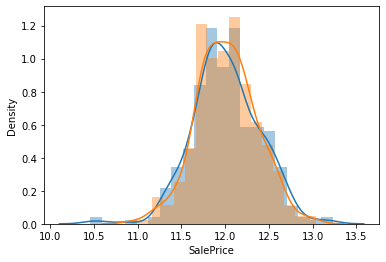

In [938]:
# Distribution plot of Prediction
sns.distplot(y_test,)
sns.distplot(gd.predict(x_test))

Text(0.5, 1.0, 'Gradient boosting regressor')

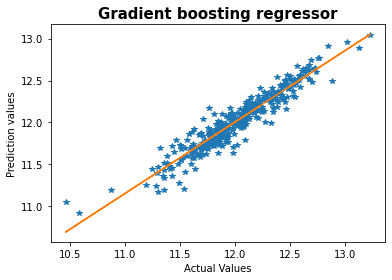

In [681]:
x=np.array(y_test)
y=np.array(gd.predict(x_test))
plt.plot(x,y,'*')
m,b=np.polyfit(x,y,1)
plt.plot(x,m*x+b,)
plt.xlabel('Actual Values')
plt.ylabel('Prediction values')
plt.title('Gradient boosting regressor',{'fontweight':'bold','fontsize':15})

In [914]:
# Original Predication
pd.DataFrame({'ID':X_test['Id'],'Prediction':gd.predict(X_test1)})

,ID,Prediction
0,337.0,12.058368
1,1018.0,11.733894
2,929.0,11.957076
3,1148.0,11.531269
4,1227.0,11.866351
...,...,...
287,83.0,11.930356
288,1048.0,11.500833
289,17.0,11.555771
290,523.0,11.612160


In [911]:
house_price=pd.DataFrame({'ID':X_test['Id'],'Prediction':np.exp(gd.predict(X_test1))})

In [913]:
house_price.head(10)

,ID,Prediction
0,337.0,172537.229585
1,1018.0,124728.362422
2,929.0,155916.447043
3,1148.0,101851.326551
4,1227.0,142393.641501
5,650.0,69200.510582
6,1453.0,104318.307390
7,152.0,166767.672200
8,427.0,138337.116055
9,776.0,114456.069470


In [915]:
house_price.to_csv('Datafile.csv',index=False)